Całkowita liczba wartości singularnych: 800
Liczba wartości potrzebna do zachowania 90% informacji: 121
Stopień kompresji (przybliżony): 69.73%


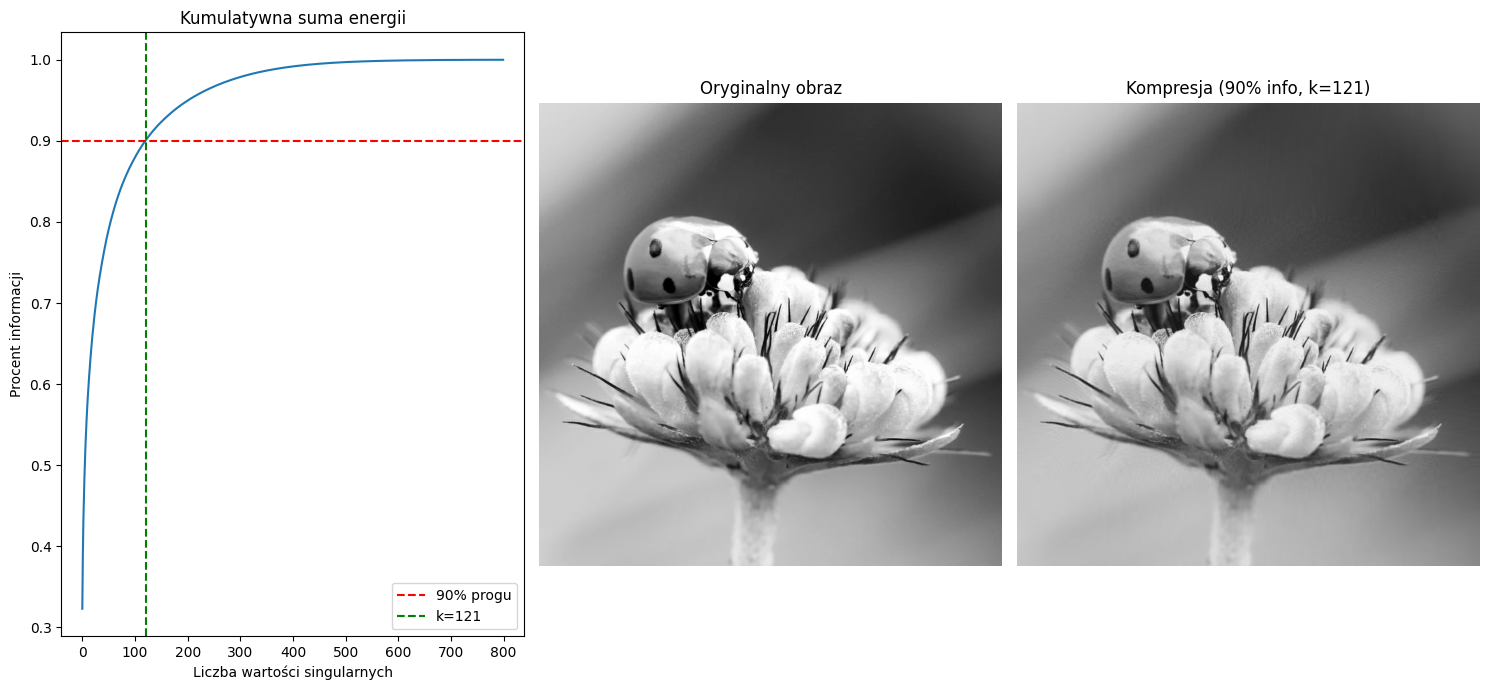

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#Wczytanie obrazu
try:
    img = Image.open('5.webp').convert('L')  # Konwersja na odcienie szarości dla uproszczenia SVD
    A = np.array(img)
except FileNotFoundError:
    print("Błąd: Nie znaleziono pliku '5.webp'. Upewnij się, że plik jest w folderze roboczym.")
    A = np.random.rand(512, 512) 

#Wykonanie dekompozycji SVD
U, S, Vt = np.linalg.svd(A, full_matrices=False)

#Obliczenie energii (informacji)
energy = S
total_energy = np.sum(energy)
cumulative_energy = np.cumsum(energy) / total_energy

#Znalezienie liczby wartości singularnych dla 90% informacji
k = np.where(cumulative_energy >= 0.90)[0][0] + 1

print(f"Całkowita liczba wartości singularnych: {len(S)}")
print(f"Liczba wartości potrzebna do zachowania 90% informacji: {k}")
print(f"Stopień kompresji (przybliżony): {100 * (1 - (k * (A.shape[0] + A.shape[1] + 1)) / (A.shape[0] * A.shape[1])):.2f}%")

#Rekonstrukcja obrazu przy użyciu k wartości
Ak = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

# 6. Wizualizacja wyników
plt.figure(figsize=(15, 7))

#Wykres kumulatywnej energii
plt.subplot(1, 3, 1)
plt.plot(cumulative_energy)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% progu')
plt.axvline(x=k, color='g', linestyle='--', label=f'k={k}')
plt.title('Kumulatywna suma energii')
plt.xlabel('Liczba wartości singularnych')
plt.ylabel('Procent informacji')
plt.legend()

#Obraz oryginalny
plt.subplot(1, 3, 2)
plt.imshow(A, cmap='gray')
plt.title('Oryginalny obraz')
plt.axis('off')

#Obraz skompresowany (90% informacji)
plt.subplot(1, 3, 3)
plt.imshow(Ak, cmap='gray')
plt.title(f'Kompresja (90% info, k={k})')
plt.axis('off')

plt.tight_layout()
plt.show()